<a href="https://colab.research.google.com/github/Frhan21/Praktikum-Fisika-Komputasi/blob/main/Curve_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabel nilai - nilai yang diperlukan

   x    y   x*y  x^2
1  1  0.5   0.5    1
2  2  2.5   5.0    4
3  3  2.0   6.0    9
4  4  4.0  16.0   16
5  5  3.5  17.5   25
6  6  6.0  36.0   36
7  7  5.5  38.5   49 

Jumlah x   = 28
Jumlah y   = 24.0
Jumlah x*y = 119.5
Jumlah x^2 = 140
Nilai a1 adalah 0.839
Nilai a0 adalah 0.0714
Maka persamaan garisnya menjadi y = 0.0714 + 0.839*x 
Grafik yang kita dapatkan sebagai berikut :


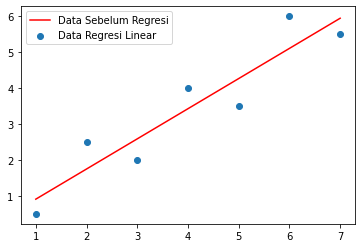

In [ ]:
#Curve Fitting ==> Regresi Linear 
import matplotlib.pyplot as plt 
import pandas as pd


x = [1,2,3,4,5,6,7]
y = [0.5,2.5,2,4,3.5,6,5.5]
n = len(x)
# print(n)


jum_x = 0
jum_y = 0 
jum_xy = 0 
jum_x2 = 0

xy2 =[]
x3 =[]

for i in range (n):
  xy = x[i]*y[i]
  xy2.append(xy)
  jum_xy += xy

  x2 = (x[i])**2
  x3.append(x2)
  jum_x2 += x2 

  jum_x += x[i]
  jum_y += y[i]

no =[]
for i in range (1,n+1):
  no.append(i)
# print(no)

data ={'x': x,
       'y': y,
       'x*y':xy2,
       'x^2':x3}
print('Tabel nilai - nilai yang diperlukan')
print('===================================\n')
df =pd.DataFrame(data,index=no)
print(df,'\n')
df.head()


print("Jumlah x   = {}". format(jum_x))
print("Jumlah y   = {}". format(jum_y))
print("Jumlah x*y = {}". format(jum_xy))
print("Jumlah x^2 = {}". format(jum_x2))


#Mencari nilai a1 
a1 = ((n*jum_xy) - (jum_x*jum_y)) / ((n*jum_x2) - (jum_x**2))
print("Nilai a1 adalah {0:3.3f}".format(a1))

#Mencari nilai a0
#a0 = yrata2 - a1 * xrata2
a0 = (jum_y/n) - (a1*(jum_x/n))
print('Nilai a0 adalah {0:0.4f}'.format(a0))

print("Maka persamaan garisnya menjadi y = {:0.4f} + {:.3f}*x ". format(a0,a1))

#Plot Gambar 
print("Grafik yang kita dapatkan sebagai berikut :")
yt = []
for i in range (n):
  a = 0.0714 + 0.839*x[i]
  yt.append(a) 

plt.scatter(x,y)
plt.plot(x,yt,color='red')
plt.legend(['Data Sebelum Regresi','Data Regresi Linear'])
plt.show()


a. Mencari nilai n dan nilai miu0 dari persamaan tersebut

Persamaan awal kita dapatkan 
T = miu*gamma^n 

Nilai n didapatkan 0.447
Nilai miu0 yang kita dapatkan adalah 1.149

b. Nilai tau pada saat gamma = 80/s
Nilai tau pada saat gamma = 80/s adalah 8.134

     tau  gamma  Log Gama  Log Tau  Log gamma x Log Tau  Log gamma ^ 2
1   6.70     50  1.698970  1.01368             1.403476       2.886499
2   7.50     70  1.845098  1.01368             1.614574       3.404387
3   8.60     90  1.954243  1.01368             1.826237       3.819064
4   9.20    110  2.041393  1.01368             1.967469       4.167284
5  10.32    130  2.113943  1.01368             2.142861       4.468756

Jumlah :
Log Tau             = 4.613
Log Gamma           = 9.654
Log Tau * Log Gamma = 8.955
(Log Gamma)^2       = 18.746



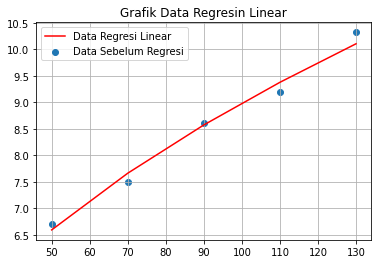

,tau,gamma,Log Gama,Log Tau,Log gamma x Log Tau,Log gamma ^ 2
1,6.70,50,1.698970,1.01368,1.403476,2.886499
2,7.50,70,1.845098,1.01368,1.614574,3.404387
3,8.60,90,1.954243,1.01368,1.826237,3.819064
4,9.20,110,2.041393,1.01368,1.967469,4.167284
5,10.32,130,2.113943,1.01368,2.142861,4.468756


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

gamma = [50,70,90,110,130]
tau = [6.7,7.5,8.6,9.2,10.32]

N = len(gamma)
print('a. Mencari nilai n dan nilai miu0 dari persamaan tersebut')
print('=========================================================\n')
print('Persamaan awal kita dapatkan ')
print('T = miu*gamma^n ')

sum_gam = 0
g = []
for i in range (N):
  gam = np.log10(gamma[i])
  g.append(gam)
  sum_gam += gam
  # print(gam)
  


sum_tau = 0
tAu = []
for i in range (N):
  t = np.log10(tau[i])
  tAu.append(t)
  sum_tau += t


sum_tauge = 0
tauge= []
for i in range (N):
  tg = np.log10(tau[i]) * np.log10(gamma[i])
  tauge.append(tg)
  sum_tauge += tg


sum_gam2 = 0
gam2 = []
for i in range (N):
  gam = (np.log10(gamma[i]))**2
  gam2.append(gam)
  sum_gam2 += gam
# print('%0.3f'%sum_gam2)

#mencari nilai n 
print()
n = ((N*sum_tauge)-(sum_tau*sum_gam)) / ((N*sum_gam2)-(sum_gam)**2)
print('Nilai n didapatkan %0.3f'%n)
miu1 = ((sum_tau/N)-n*(sum_gam/N))
miu0 = 10**miu1
print('Nilai miu0 yang kita dapatkan adalah {0:0.3f}\n'.format(miu0))


print('b. Nilai tau pada saat gamma = 80/s')
print('===================================')

ta = miu0*(80**n)
print ("Nilai tau pada saat gamma = 80/s adalah {:.3f}".format(ta))


print()
#Membuat Tabel 
data = {'tau': tau,
        'gamma' : gamma,
        'Log Gama':g,
        'Log Tau': t,
        'Log gamma x Log Tau':tauge,
        'Log gamma ^ 2':gam2}

df = pd.DataFrame(data,index=['1','2','3','4','5'])
print(df)
print('\nJumlah :')
print('Log Tau             = {0:.3f}'.format(sum_tau))
print('Log Gamma           = {0:.3f}'.format(sum_gam))
print('Log Tau * Log Gamma = {0:.3f}'.format(sum_tauge))
print('(Log Gamma)^2       = {0:.3f}'.format(sum_gam2))


print()
#Memplot data kedalam grafik 
Tau = []
for i in range (N):
  # t = 10**(miu1 + 0.447*(np.log10(gamma[i])))
  t = miu0*(gamma[i]**n)
  Tau.append(t)
# print(Tau)
plt.title('Grafik Data Regresin Linear',loc='center')
plt.scatter(gamma,tau)
plt.plot(gamma,Tau, color='red')
plt.legend(['Data Regresi Linear','Data Sebelum Regresi'])
plt.grid()
plt.show()
df.head()
